In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
bike = pd.read_csv("day.csv")
# Check the head of the dataset
bike.head()

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18       1   0     1        0        6           0   
1        2  02/01/18       1   0     1        0        0           0   
2        3  03/01/18       1   0     1        0        1           1   
3        4  04/01/18       1   0     1        0        2           1   
4        5  05/01/18       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Steps to be followed:

1. Reading, Understanding and Visualising the Data
2. Preparing the data for modelling (train-test, rescaling, etc.) + pre-processing steps
3. Train the models (selecting variables, removing variables having multi-collinearity)
4. Residual Analysis
5. Predictions and Evaluation on the test test

## Reading, Understanding and Visualising the Data 

In [3]:
import matplotlib.pyplot as plt

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#There are no null values to be taken care of

In [5]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
#see if variables have multi collinearity

In [7]:
import seaborn as sns

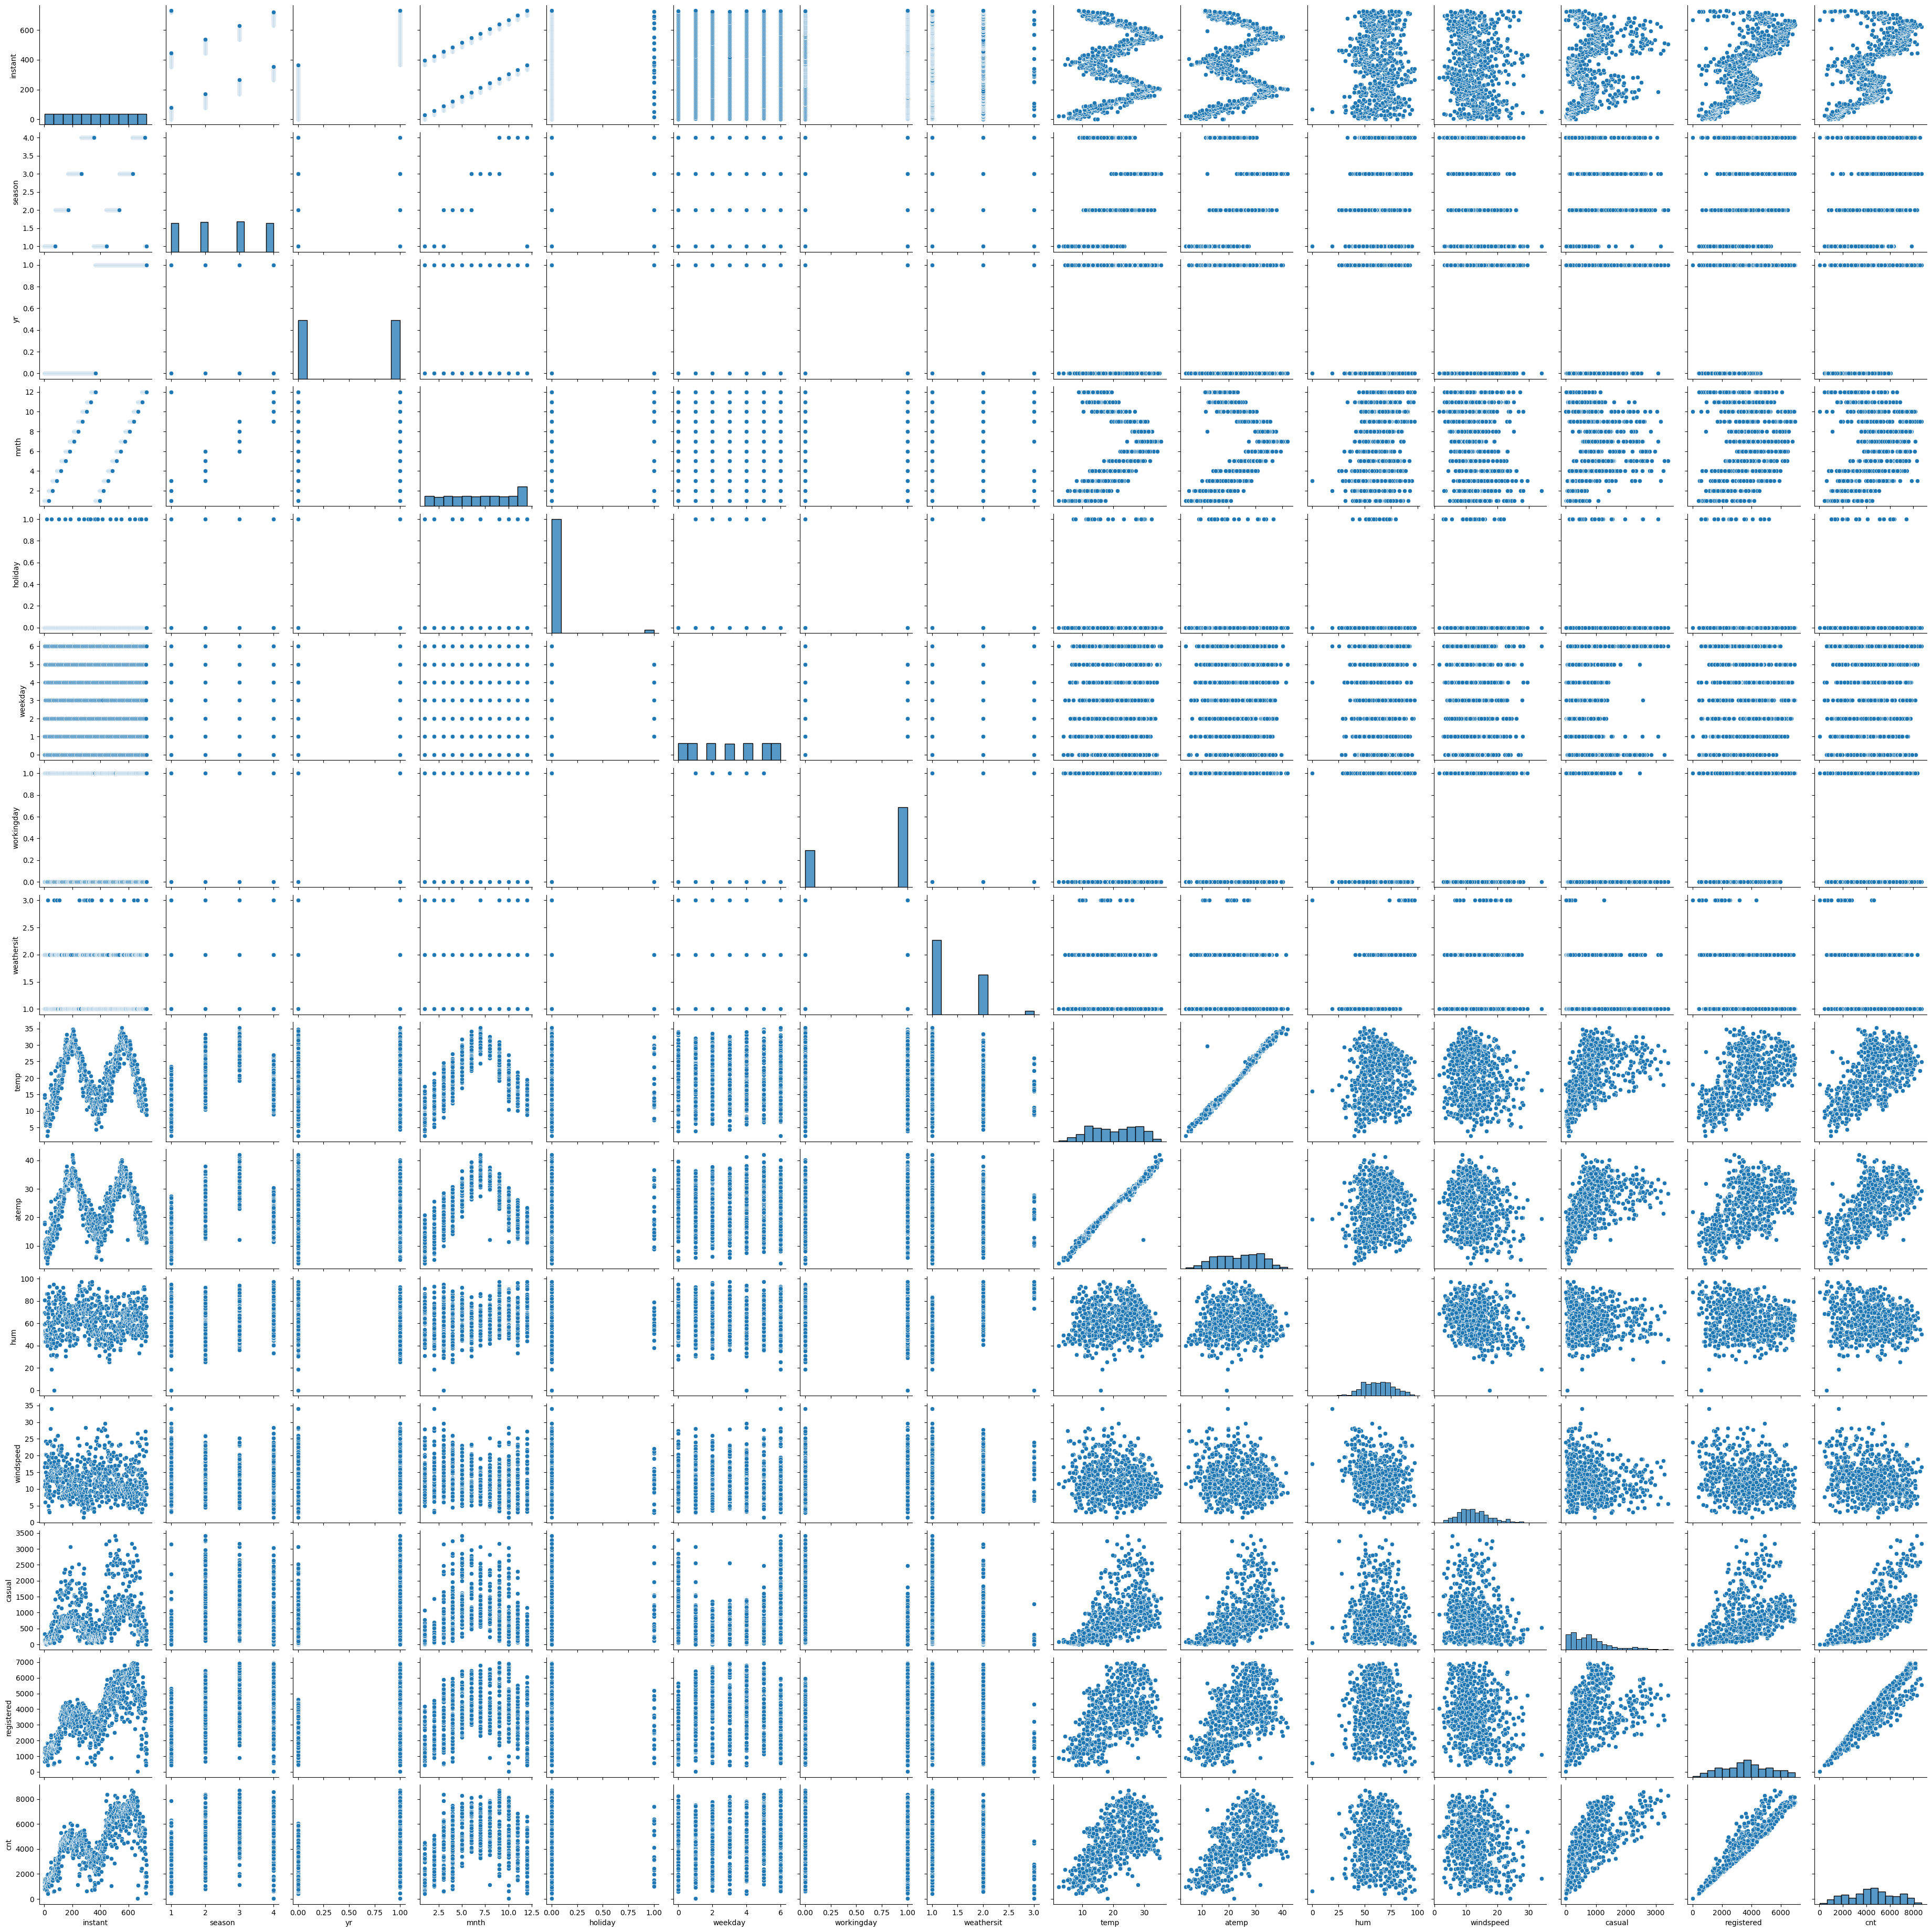

In [8]:
#visualising the numeric variables
sns.pairplot(bike)
plt.show()

In [9]:
# Define the mapping dictionary for the season values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Replace the column values and convert to strings
bike['season'] = bike['season'].replace(season_mapping).astype(str)

bike.head(10)

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18  spring   0     1        0        6           0   
1        2  02/01/18  spring   0     1        0        0           0   
2        3  03/01/18  spring   0     1        0        1           1   
3        4  04/01/18  spring   0     1        0        2           1   
4        5  05/01/18  spring   0     1        0        3           1   
5        6  06/01/18  spring   0     1        0        4           1   
6        7  07/01/18  spring   0     1        0        5           1   
7        8  08/01/18  spring   0     1        0        6           0   
8        9  09/01/18  spring   0     1        0        0           0   
9       10  10/01/18  spring   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [10]:
# Define the mapping dictionary for the season values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Replace the column values and convert to strings
bike['season'] = bike['season'].replace(season_mapping).astype(str)

bike.head(10)

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18  spring   0     1        0        6           0   
1        2  02/01/18  spring   0     1        0        0           0   
2        3  03/01/18  spring   0     1        0        1           1   
3        4  04/01/18  spring   0     1        0        2           1   
4        5  05/01/18  spring   0     1        0        3           1   
5        6  06/01/18  spring   0     1        0        4           1   
6        7  07/01/18  spring   0     1        0        5           1   
7        8  08/01/18  spring   0     1        0        6           0   
8        9  09/01/18  spring   0     1        0        0           0   
9       10  10/01/18  spring   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [11]:
# Define the mapping dictionary for the weather values
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'rainy', 4: 'stormy'}

# Replace the column values and convert to strings
bike['weathersit'] = bike['weathersit'].replace(weather_mapping).astype(str)


In [12]:
bike.head(10)

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18  spring   0     1        0        6           0   
1        2  02/01/18  spring   0     1        0        0           0   
2        3  03/01/18  spring   0     1        0        1           1   
3        4  04/01/18  spring   0     1        0        2           1   
4        5  05/01/18  spring   0     1        0        3           1   
5        6  06/01/18  spring   0     1        0        4           1   
6        7  07/01/18  spring   0     1        0        5           1   
7        8  08/01/18  spring   0     1        0        6           0   
8        9  09/01/18  spring   0     1        0        0           0   
9       10  10/01/18  spring   0     1        0        1           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1     cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5      clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6     cloudy   8.057402  10.44195  49.8696  11.304642     148        1362   
7     cloudy   6.765000   8.11270  53.5833  17.875868      68         891   
8      clear   5.671653   5.80875  43.4167  24.250650      54         768   
9      clear   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

<Axes: xlabel='season', ylabel='cnt'>

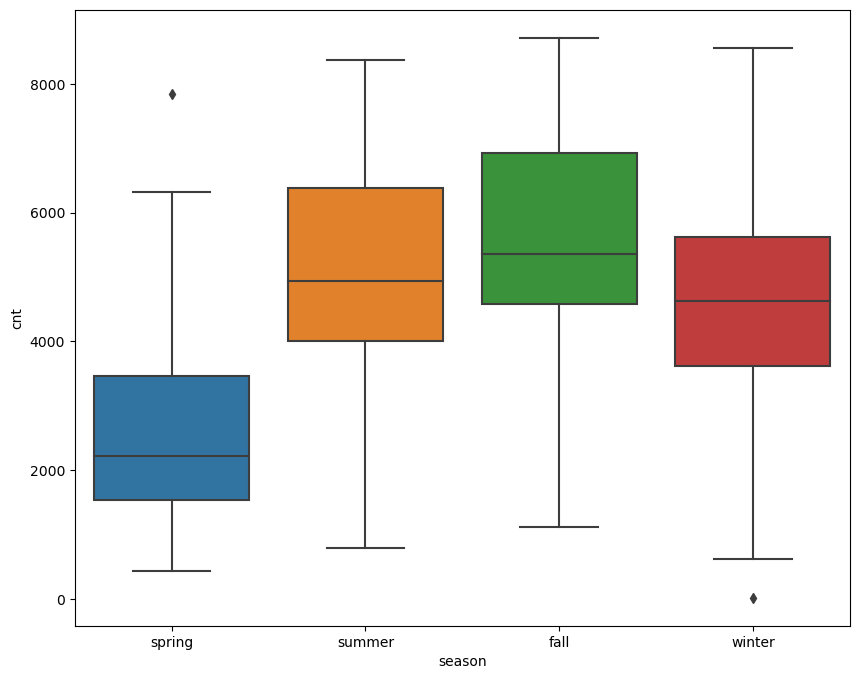

In [13]:
#Visualising Categorical Variables
plt.figure(figsize=(10,8))
sns.boxplot(x='season',y='cnt',data=bike)

#Demand is higher during fall and summer

In [14]:
#Visualising Categorical Variables
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit',y='cnt',data=bike)

#Demand is similar on cloudy and clear days - rainy is significantly lower

<Axes: xlabel='weathersit', ylabel='cnt'>

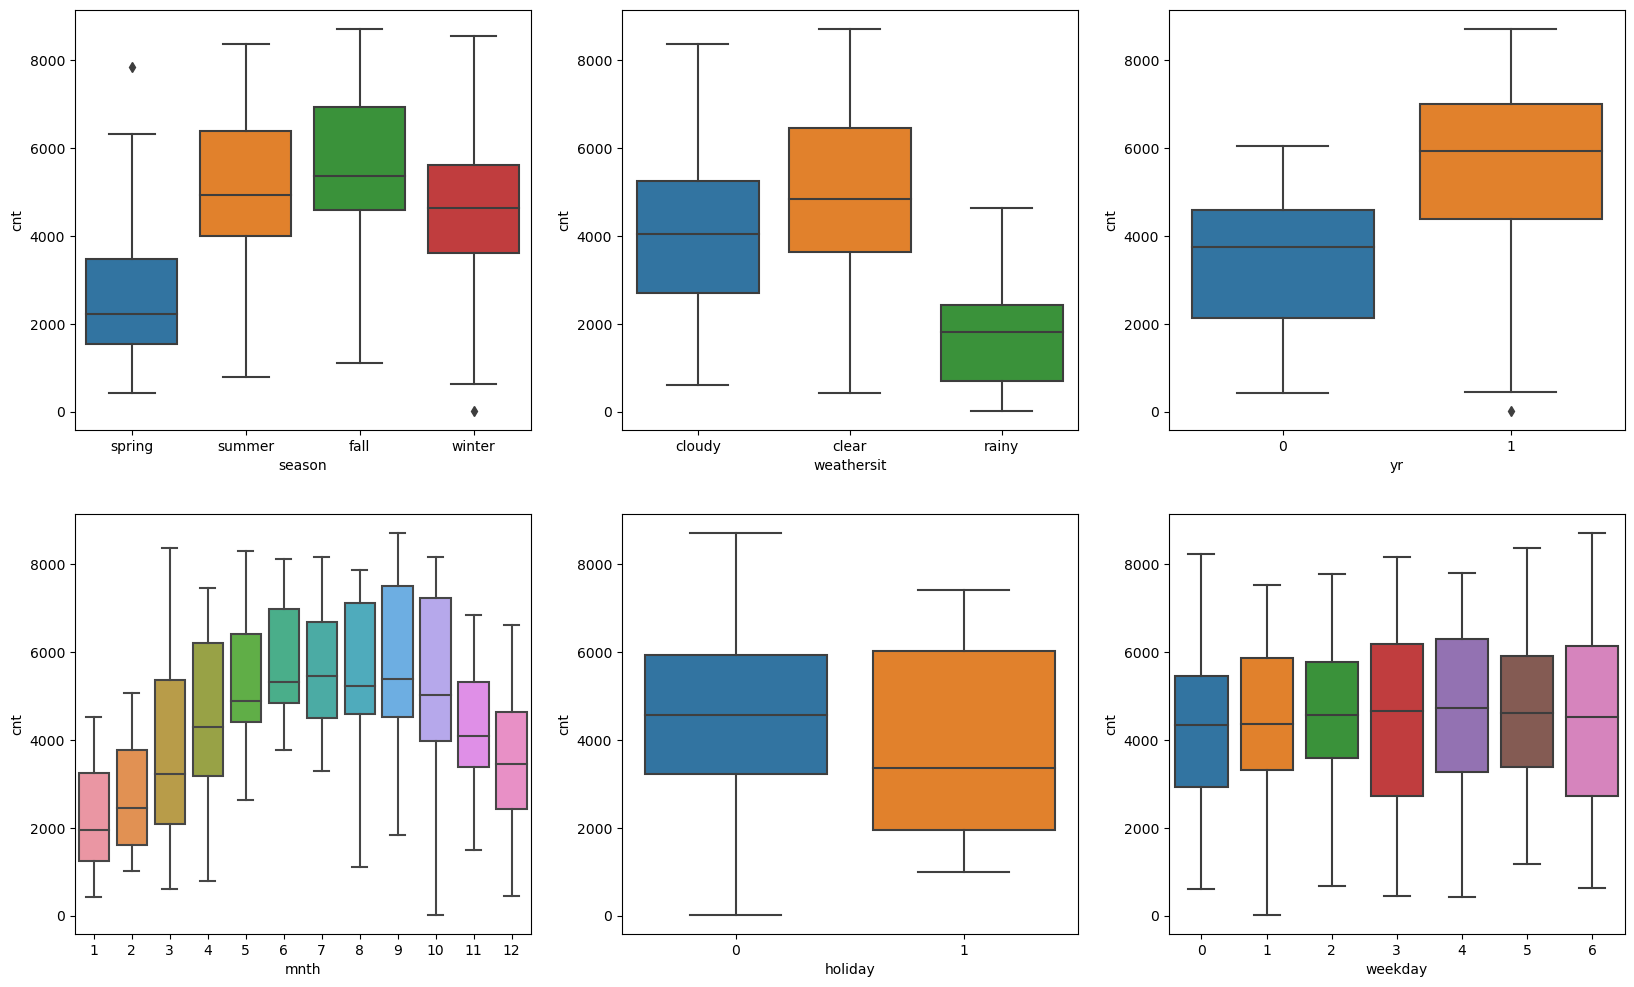

In [15]:
# visualising the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

## Creating Dummy Variables for 3 or more categorical varaibles

In [16]:
# Get the dummy variables for the feature 'season'
status = pd.get_dummies(bike['season'])

In [17]:
status

fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
725     0       1       0       0
726     0       1       0       0
727     0       1       0       0
728     0       1       0       0
729     0       1       0       0

[730 rows x 4 columns]

Now, we don't need four columns. We can drop the winter column, as the season can be identified with just the last three columns where —

- 000 will correspond to winter
- 010 will correspond to spring
- 100 will correspond to fall and
- 001 will correspond to summer

In [18]:
# joining original df 
bike= pd.concat([bike, status], axis = 1)
bike.head()

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18  spring   0     1        0        6           0   
1        2  02/01/18  spring   0     1        0        0           0   
2        3  03/01/18  spring   0     1        0        1           1   
3        4  04/01/18  spring   0     1        0        2           1   
4        5  05/01/18  spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1     cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  fall  spring  summer  winter  
0   985     0       1       0       0  
1   801     0       1       0       0  
2  1349     0       1       0       0  
3  1562     0       1       0       0  
4  1600     0       1       0       0

In [19]:
# dropping categorical furnishing status
bike = bike.drop('winter', axis = 1)
bike.head()

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/18  spring   0     1        0        6           0   
1        2  02/01/18  spring   0     1        0        0           0   
2        3  03/01/18  spring   0     1        0        1           1   
3        4  04/01/18  spring   0     1        0        2           1   
4        5  05/01/18  spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1     cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  fall  spring  summer  
0   985     0       1       0  
1   801     0       1       0  
2  1349     0       1       0  
3  1562     0       1       0  
4  1600     0       1       0

In [20]:
# dropping categorical furnishing status
bike = bike.drop('season', axis = 1)
bike.head()

instant    dteday  yr  mnth  holiday  weekday  workingday weathersit  \
0        1  01/01/18   0     1        0        6           0     cloudy   
1        2  02/01/18   0     1        0        0           0     cloudy   
2        3  03/01/18   0     1        0        1           1      clear   
3        4  04/01/18   0     1        0        2           1      clear   
4        5  05/01/18   0     1        0        3           1      clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  fall  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985     0   
1  14.902598  17.68695  69.6087  16.652113     131         670   801     0   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349     0   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562     0   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600     0   

   spring  summer  
0       1       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0

In [21]:
# Get the dummy variables for the feature 'weather situation' and store it in a new variable - 'status'
status = pd.get_dummies(bike['weathersit'])

In [22]:
status

clear  cloudy  rainy
0        0       1      0
1        0       1      0
2        1       0      0
3        1       0      0
4        1       0      0
..     ...     ...    ...
725      0       1      0
726      0       1      0
727      0       1      0
728      1       0      0
729      0       1      0

[730 rows x 3 columns]

In [23]:
# joining original df 
bike= pd.concat([bike, status], axis = 1)
bike.head()

instant    dteday  yr  mnth  holiday  weekday  workingday weathersit  \
0        1  01/01/18   0     1        0        6           0     cloudy   
1        2  02/01/18   0     1        0        0           0     cloudy   
2        3  03/01/18   0     1        0        1           1      clear   
3        4  04/01/18   0     1        0        2           1      clear   
4        5  05/01/18   0     1        0        3           1      clear   

        temp     atemp  ...  windspeed  casual  registered   cnt  fall  \
0  14.110847  18.18125  ...  10.749882     331         654   985     0   
1  14.902598  17.68695  ...  16.652113     131         670   801     0   
2   8.050924   9.47025  ...  16.636703     120        1229  1349     0   
3   8.200000  10.60610  ...  10.739832     108        1454  1562     0   
4   9.305237  11.46350  ...  12.522300      82        1518  1600     0   

   spring  summer  clear  cloudy  rainy  
0       1       0      0       1      0  
1       1       0      0       1      0  
2       1       0      1       0      0  
3       1       0      1       0      0  
4       1       0      1       0      0  

[5 rows x 21 columns]

Now, we don't need three columns. We can drop the rainy column, as the weather can be identified with just the last two columns where —

- 00 will correspond to rainy
- 01 will correspond to cloudy
- 10 will correspond to clear

In [24]:
# dropping categorical rainy status as it is redundant
bike = bike.drop('rainy', axis = 1)
bike.head()

instant    dteday  yr  mnth  holiday  weekday  workingday weathersit  \
0        1  01/01/18   0     1        0        6           0     cloudy   
1        2  02/01/18   0     1        0        0           0     cloudy   
2        3  03/01/18   0     1        0        1           1      clear   
3        4  04/01/18   0     1        0        2           1      clear   
4        5  05/01/18   0     1        0        3           1      clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  fall  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985     0   
1  14.902598  17.68695  69.6087  16.652113     131         670   801     0   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349     0   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562     0   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600     0   

   spring  summer  clear  cloudy  
0       1       0      0       1  
1       1       0      0       1  
2       1       0      1       0  
3       1       0      1       0  
4       1       0      1       0

In [25]:
# dropping categorical weather situation 
bike = bike.drop('weathersit', axis = 1)
bike.head()

instant    dteday  yr  mnth  holiday  weekday  workingday       temp  \
0        1  01/01/18   0     1        0        6           0  14.110847   
1        2  02/01/18   0     1        0        0           0  14.902598   
2        3  03/01/18   0     1        0        1           1   8.050924   
3        4  04/01/18   0     1        0        2           1   8.200000   
4        5  05/01/18   0     1        0        3           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  fall  spring  \
0  18.18125  80.5833  10.749882     331         654   985     0       1   
1  17.68695  69.6087  16.652113     131         670   801     0       1   
2   9.47025  43.7273  16.636703     120        1229  1349     0       1   
3  10.60610  59.0435  10.739832     108        1454  1562     0       1   
4  11.46350  43.6957  12.522300      82        1518  1600     0       1   

   summer  clear  cloudy  
0       0      0       1  
1       0      0       1  
2       0      1       0  
3       0      1       0  
4       0      1       0

In [26]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'status'. 
#Month is a categorical variable
status = pd.get_dummies(bike['mnth'])

In [27]:
status

1   2   3   4   5   6   7   8   9   10  11  12
0     1   0   0   0   0   0   0   0   0   0   0   0
1     1   0   0   0   0   0   0   0   0   0   0   0
2     1   0   0   0   0   0   0   0   0   0   0   0
3     1   0   0   0   0   0   0   0   0   0   0   0
4     1   0   0   0   0   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
725   0   0   0   0   0   0   0   0   0   0   0   1
726   0   0   0   0   0   0   0   0   0   0   0   1
727   0   0   0   0   0   0   0   0   0   0   0   1
728   0   0   0   0   0   0   0   0   0   0   0   1
729   0   0   0   0   0   0   0   0   0   0   0   1

[730 rows x 12 columns]

In [28]:
# Define a list of month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Rename columns using the list of month names
status.columns = months

In [29]:
status

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0      1    0    0    0    0    0    0    0    0    0    0    0
1      1    0    0    0    0    0    0    0    0    0    0    0
2      1    0    0    0    0    0    0    0    0    0    0    0
3      1    0    0    0    0    0    0    0    0    0    0    0
4      1    0    0    0    0    0    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
725    0    0    0    0    0    0    0    0    0    0    0    1
726    0    0    0    0    0    0    0    0    0    0    0    1
727    0    0    0    0    0    0    0    0    0    0    0    1
728    0    0    0    0    0    0    0    0    0    0    0    1
729    0    0    0    0    0    0    0    0    0    0    0    1

[730 rows x 12 columns]

In [30]:
# joining original df 
bike= pd.concat([bike, status], axis = 1)
bike.head()

instant    dteday  yr  mnth  holiday  weekday  workingday       temp  \
0        1  01/01/18   0     1        0        6           0  14.110847   
1        2  02/01/18   0     1        0        0           0  14.902598   
2        3  03/01/18   0     1        0        1           1   8.050924   
3        4  04/01/18   0     1        0        2           1   8.200000   
4        5  05/01/18   0     1        0        3           1   9.305237   

      atemp      hum  ...  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0  18.18125  80.5833  ...    0    0    0    0    0    0    0    0    0    0  
1  17.68695  69.6087  ...    0    0    0    0    0    0    0    0    0    0  
2   9.47025  43.7273  ...    0    0    0    0    0    0    0    0    0    0  
3  10.60610  59.0435  ...    0    0    0    0    0    0    0    0    0    0  
4  11.46350  43.6957  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 31 columns]

In [31]:
# dropping categorical redundant variables
bike = bike.drop(['mnth','Dec'], axis = 1)
bike.head()

instant    dteday  yr  holiday  weekday  workingday       temp     atemp  \
0        1  01/01/18   0        0        6           0  14.110847  18.18125   
1        2  02/01/18   0        0        0           0  14.902598  17.68695   
2        3  03/01/18   0        0        1           1   8.050924   9.47025   
3        4  04/01/18   0        0        2           1   8.200000  10.60610   
4        5  05/01/18   0        0        3           1   9.305237  11.46350   

       hum  windspeed  ...  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  
0  80.5833  10.749882  ...    0    0    0    0    0    0    0    0    0    0  
1  69.6087  16.652113  ...    0    0    0    0    0    0    0    0    0    0  
2  43.7273  16.636703  ...    0    0    0    0    0    0    0    0    0    0  
3  59.0435  10.739832  ...    0    0    0    0    0    0    0    0    0    0  
4  43.6957  12.522300  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [32]:
# Get the dummy variables for the categorical variable 'weekday' and store it in a new variable - 'status'
status = pd.get_dummies(bike['weekday'])

In [33]:
status

0  1  2  3  4  5  6
0    0  0  0  0  0  0  1
1    1  0  0  0  0  0  0
2    0  1  0  0  0  0  0
3    0  0  1  0  0  0  0
4    0  0  0  1  0  0  0
..  .. .. .. .. .. .. ..
725  0  0  0  0  1  0  0
726  0  0  0  0  0  1  0
727  0  0  0  0  0  0  1
728  1  0  0  0  0  0  0
729  0  1  0  0  0  0  0

[730 rows x 7 columns]

In [34]:
# Define a list of month names
days = ['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']

# Rename columns using the list of month names
status.columns = days

In [35]:
status

Tue  Wed  Thu  Fri  Sat  Sun  Mon
0      0    0    0    0    0    0    1
1      1    0    0    0    0    0    0
2      0    1    0    0    0    0    0
3      0    0    1    0    0    0    0
4      0    0    0    1    0    0    0
..   ...  ...  ...  ...  ...  ...  ...
725    0    0    0    0    1    0    0
726    0    0    0    0    0    1    0
727    0    0    0    0    0    0    1
728    1    0    0    0    0    0    0
729    0    1    0    0    0    0    0

[730 rows x 7 columns]

In [36]:
# joining original df 
bike= pd.concat([bike, status], axis = 1)
bike.head()

instant    dteday  yr  holiday  weekday  workingday       temp     atemp  \
0        1  01/01/18   0        0        6           0  14.110847  18.18125   
1        2  02/01/18   0        0        0           0  14.902598  17.68695   
2        3  03/01/18   0        0        1           1   8.050924   9.47025   
3        4  04/01/18   0        0        2           1   8.200000  10.60610   
4        5  05/01/18   0        0        3           1   9.305237  11.46350   

       hum  windspeed  ...  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  Mon  
0  80.5833  10.749882  ...    0    0    0    0    0    0    0    0    0    1  
1  69.6087  16.652113  ...    0    0    0    1    0    0    0    0    0    0  
2  43.7273  16.636703  ...    0    0    0    0    1    0    0    0    0    0  
3  59.0435  10.739832  ...    0    0    0    0    0    1    0    0    0    0  
4  43.6957  12.522300  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 36 columns]

In [37]:
# dropping redundant varibles
bike = bike.drop(['weekday','Mon'], axis = 1)
bike.head()

instant    dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01/01/18   0        0           0  14.110847  18.18125  80.5833   
1        2  02/01/18   0        0           0  14.902598  17.68695  69.6087   
2        3  03/01/18   0        0           1   8.050924   9.47025  43.7273   
3        4  04/01/18   0        0           1   8.200000  10.60610  59.0435   
4        5  05/01/18   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
0  10.749882     331  ...    0    0    0    0    0    0    0    0    0    0  
1  16.652113     131  ...    0    0    0    0    1    0    0    0    0    0  
2  16.636703     120  ...    0    0    0    0    0    1    0    0    0    0  
3  10.739832     108  ...    0    0    0    0    0    0    1    0    0    0  
4  12.522300      82  ...    0    0    0    0    0    0    0    1    0    0  

[5 rows x 34 columns]

In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  fall        730 non-null    uint8  
 13  spring      730 non-null    uint8  
 14  summer      730 non-null    uint8  
 15  clear       730 non-null    uint8  
 16  cloudy      730 non-null    uint8  
 17  Jan         730 non-null    uint8  
 18  Feb         730 non-null    uint8  
 19  Mar         730 non-null    u

In [39]:
# below features are not relevant for the study
#dteday - already have info on year, month and week day
# casual and regisgtered total is cnt
bike = bike.drop(['instant','dteday','casual','registered'], axis = 1)

In [40]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   fall        730 non-null    uint8  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  clear       730 non-null    uint8  
 12  cloudy      730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Mar         730 non-null    uint8  
 16  Apr         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Jul         730 non-null    u

## Splitting into Test and Train

In [41]:
import sklearn
from sklearn.model_selection import train_test_split

In [42]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features
Features to be rescaled - temp, atemp, hum, windspeed, casual, registered, cnt

In [43]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
0     0       1  ...    0    0    0    0    0    0    0    0    0    0  
1     0       1  ...    0    0    0    0    1    0    0    0    0    0  
2     0       1  ...    0    0    0    0    0    1    0    0    0    0  
3     0       1  ...    0    0    0    0    0    0    1    0    0    0  
4     0       1  ...    0    0    0    0    0    0    0    1    0    0  

[5 rows x 30 columns]

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
#Step 1: Instantiate an Object
scaler = MinMaxScaler()
#We don't want to scale all the variables - only numeric ones
num_vars = ['temp','atemp', 'hum','windspeed','cnt']

#Step 2: Fit on Data
#scalar.fit()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  \
576  0.827658     1       0  ...    0    0    0    0    0    0    1    0    0   
426  0.465255     0       1  ...    0    0    0    0    0    0    0    0    0   
728  0.204096     0       1  ...    0    0    0    0    1    0    0    0    0   
482  0.482973     0       0  ...    0    0    0    0    0    0    0    0    0   
111  0.191095     0       0  ...    0    0    0    0    0    0    0    0    0   

     Sun  
576    0  
426    0  
728    0  
482    0  
111    1  

[5 rows x 30 columns]

In [46]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt        fall      spring  ...         Aug  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.262745    0.243137  ...    0.096078   
std      0.169803    0.224421    0.440557    0.429398  ...    0.294988   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    1.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Oct         Nov         Tue         Wed         Thu  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.084314    0.086275    0.143137    0.150980    0.131373   
std      0.272166    0.278131    0.281045    0.350557    0.358381    0.338139   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Fri         Sat         Sun  
count  510.000000  510.000000  510.000000  
mean     0.158824    0.133333    0.127451  
std      0.365870    0.340268    0.333805  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

## Step 3: Modelling

In [47]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  \
576  0.827658     1       0  ...    0    0    0    0    0    0    1    0    0   
426  0.465255     0       1  ...    0    0    0    0    0    0    0    0    0   
728  0.204096     0       1  ...    0    0    0    0    1    0    0    0    0   
482  0.482973     0       0  ...    0    0    0    0    0    0    0    0    0   
111  0.191095     0       0  ...    0    0    0    0    0    0    0    0    0   

     Sun  
576    0  
426    0  
728    0  
482    0  
111    1  

[5 rows x 30 columns]

### Forward Training Technique

In [49]:
# X_train, y_train
y_train = df_train.pop('cnt') #removes count from df_train
X_train = df_train #assigns everything but price to X_train

In [50]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  fall  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686     1   
426   1        0           0  0.442393  0.438975  0.640189   0.255342     0   
728   1        0           0  0.245101  0.200348  0.498067   0.663106     0   
482   1        0           0  0.395666  0.391735  0.504508   0.188475     0   
111   0        0           1  0.345824  0.318819  0.751824   0.380981     0   

     spring  summer  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
576       0       0  ...    0    0    0    0    0    0    1    0    0    0  
426       1       0  ...    0    0    0    0    0    0    0    0    0    0  
728       1       0  ...    0    0    0    0    1    0    0    0    0    0  
482       0       1  ...    0    0    0    0    0    0    0    0    0    0  
111       0       1  ...    0    0    0    0    0    0    0    0    0    1  

[5 rows x 29 columns]

In [51]:
#Let's look at cnt vs temp, atemp,
import statsmodels.api as sm

In [52]:
# add another variable
X_train_sm = X_train[['temp']]
X_train_sm = sm.add_constant(X_train_sm)

# Creating 2nd model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.46e-61
Time:                        20:39:12   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# add another variable
X_train_sm = X_train[['temp','atemp']]
X_train_sm = sm.add_constant(X_train_sm)

# Creating 2nd model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.162664
temp     0.185345
atemp    0.489566
dtype: float64

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           8.38e-61
Time:                        20:39:12   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# add another variable
X_train_sm = X_train[['temp','atemp','yr']]
X_train_sm = sm.add_constant(X_train_sm)

# Creating 2nd model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.072045
temp     0.079760
atemp    0.542002
yr       0.237193
dtype: float64

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     388.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.71e-131
Time:                        20:39:12   Log-Likelihood:                 343.36
No. Observations:                 510   AIC:                            -678.7
Df Residuals:                     506   BIC:                            -661.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.015      4.813      0.000       0.043       0.101
temp           0.0798      0.169      0.473      0.636      -0.252       0.411
atemp          0.5420      0.179      3.024      0.003       0.190       0.894
yr             0.2372      0.011     21.485      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.381
Skew:                          -0.555   Prob(JB):                     3.47e-13
Kurtosis:                       4.212   Cond. No.                         61.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# add another variable
X_train_sm = X_train[['temp','atemp','yr','hum']]
X_train_sm = sm.add_constant(X_train_sm)

# Creating 2nd model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.182235
temp     0.012090
atemp    0.635849
yr       0.231821
hum     -0.183328
dtype: float64

In [59]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.05e-134
Time:                        20:39:12   Log-Likelihood:                 355.02
No. Observations:                 510   AIC:                            -700.0
Df Residuals:                     505   BIC:                            -678.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1822      0.027      6.752      0.000       0.129       0.235
temp           0.0121      0.166      0.073      0.942      -0.313       0.337
atemp          0.6358      0.176      3.604      0.000       0.289       0.982
yr             0.2318      0.011     21.351      0.000       0.210       0.253
hum           -0.1833      0.038     -4.861      0.000      -0.257      -0.109
==============================================================================
Omnibus:                       31.072   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.276
Skew:                          -0.481   Prob(JB):                     2.43e-10
Kurtosis:                       4.076   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns

In [63]:
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]


In [64]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2    atemp  48.64
1     temp  48.43
0    const  25.28
4      hum   1.05
3       yr   1.02

In [65]:
X_train_sm = X_train_sm.drop(columns = ['temp'])

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns

In [67]:
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]


In [68]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0    const  25.22
1    atemp   1.04
3      hum   1.04
2       yr   1.02

#### While this approach is good, it is very tedious and will take a long long time for further analysis due to high number of parameters

## Bottom Up Approach

In [69]:
# build a model with all the variables
X_train_sm2 = sm.add_constant(X_train)

In [70]:
X_train_sm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   atemp       510 non-null    float64
 6   hum         510 non-null    float64
 7   windspeed   510 non-null    float64
 8   fall        510 non-null    uint8  
 9   spring      510 non-null    uint8  
 10  summer      510 non-null    uint8  
 11  clear       510 non-null    uint8  
 12  cloudy      510 non-null    uint8  
 13  Jan         510 non-null    uint8  
 14  Feb         510 non-null    uint8  
 15  Mar         510 non-null    uint8  
 16  Apr         510 non-null    uint8  
 17  May         510 non-null    uint8  
 18  Jun         510 non-null    uint8  
 19  Jul         510 non-null   

In [71]:
lr = sm.OLS(y_train, X_train_sm2)


In [72]:
#fit
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.81e-180
Time:                        20:39:12   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1463      0.046      3.155      0.002       0.055       0.237
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday       -0.0804      0.024     -3.397      0.001      -0.127      -0.034
workingday     0.0050      0.009      0.552      0.581      -0.013       0.023
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
fall          -0.1071      0.028     -3.826      0.000      -0.162      -0.052
spring        -0.1524      0.026     -5.866      0.000      -0.203      -0.101
summer        -0.0647      0.030     -2.173      0.030      -0.123      -0.006
clear          0.2550      0.026      9.631      0.000       0.203       0.307
cloudy         0.1955      0.025      7.787      0.000       0.146       0.245
Jan           -0.0188      0.027     -0.708      0.479      -0.071       0.033
Feb            0.0120      0.027      0.438      0.662      -0.042       0.066
Mar            0.0458      0.026      1.747      0.081      -0.006       0.097
Apr            0.0443      0.034      1.316      0.189      -0.022       0.110
May            0.0698      0.036      1.966      0.050    2.69e-05       0.140
Jun            0.0503      0.036      1.383      0.167      -0.021       0.122
Jul            0.0116      0.039      0.297      0.767      -0.065       0.089
Aug            0.0665      0.037      1.789      0.074      -0.007       0.140
Sep            0.1310      0.031      4.201      0.000       0.070       0.192
Oct            0.0520      0.022      2.320      0.021       0.008       0.096
Nov            0.0045      0.021      0.213      0.832      -0.037       0.046
Tue           -0.0542      0.015     -3.729      0.000      -0.083      -0.026
Wed           -0.0256      0.010     -2.626      0.009      -0.045      -0.006
Thu           -0.0224      0.011     -2.001      0.046      -0.044      -0.000
Fri           -0.0098      0.010     -0.936      0.350      -0.030       0.011
Sat           -0.0137      0.011     -1.255      0.210      -0.035       0.008
Sun           -0.0039      0.011     -0.351      0.726      -0.026       0.018
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     2.06e+15
==============================================================================

N

Any p-value having >0.05 is high. semi-furnished at 0.938 is very high for sure
Let's drop some variable:
- based on significance?
- Supplement with VIF 

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns

In [75]:
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]

In [76]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
29         Sun     inf
25         Wed     inf
2      holiday     inf
3   workingday     inf
28         Sat     inf
27         Fri     inf
26         Thu     inf
0        const  139.56
4         temp   66.90
5        atemp   56.03
10      summer   10.71
11       clear   10.66
8         fall    9.85
12      cloudy    9.24
9       spring    8.07
20         Aug    7.80
19         Jul    7.03
17         May    6.32
18         Jun    6.06
16         Apr    5.31
21         Sep    4.67
15         Mar    3.95
13         Jan    3.67
14         Feb    3.01
22         Oct    2.52
23         Nov    2.25
6          hum    2.05
24         Tue    1.68
7    windspeed    1.30
1           yr    1.06

In [77]:
# Dropping highly correlated variables and insignificant variables - Days of week have
#high p value of 0.407 and VIF of 53.38

X_train_sm2 = X_train_sm2.drop(columns = ['Wed','Thu','Fri','Sat','Sun'])

In [78]:
lr = sm.OLS(y_train, X_train_sm2)
#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          8.68e-184
Time:                        20:39:12   Log-Likelihood:                 525.69
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.046      3.231      0.001       0.059       0.240
yr             0.2319      0.008     28.817      0.000       0.216       0.248
holiday       -0.1027      0.027     -3.784      0.000      -0.156      -0.049
workingday    -0.0099      0.011     -0.889      0.374      -0.032       0.012
temp           0.4116      0.141      2.916      0.004       0.134       0.689
atemp          0.0373      0.137      0.271      0.786      -0.233       0.307
hum           -0.1557      0.038     -4.051      0.000      -0.231      -0.080
windspeed     -0.1854      0.026     -7.048      0.000      -0.237      -0.134
fall          -0.1062      0.028     -3.803      0.000      -0.161      -0.051
spring        -0.1503      0.026     -5.802      0.000      -0.201      -0.099
summer        -0.0637      0.030     -2.143      0.033      -0.122      -0.005
clear          0.2538      0.026      9.641      0.000       0.202       0.305
cloudy         0.1953      0.025      7.847      0.000       0.146       0.244
Jan           -0.0204      0.026     -0.770      0.442      -0.072       0.032
Feb            0.0101      0.027      0.370      0.712      -0.043       0.063
Mar            0.0440      0.026      1.683      0.093      -0.007       0.095
Apr            0.0427      0.034      1.272      0.204      -0.023       0.109
May            0.0684      0.035      1.931      0.054      -0.001       0.138
Jun            0.0480      0.036      1.325      0.186      -0.023       0.119
Jul            0.0089      0.039      0.228      0.820      -0.068       0.085
Aug            0.0645      0.037      1.741      0.082      -0.008       0.137
Sep            0.1300      0.031      4.178      0.000       0.069       0.191
Oct            0.0514      0.022      2.299      0.022       0.007       0.095
Nov            0.0044      0.021      0.212      0.832      -0.037       0.045
Tue           -0.0540      0.015     -3.719      0.000      -0.083      -0.025
==============================================================================
Omnibus:                       83.451   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.904
Skew:                          -0.787   Prob(JB):                     2.19e-52
Kurtosis:                       5.953   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns

vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0        const  139.01
4         temp   66.02
5        atemp   55.30
10      summer   10.69
11       clear   10.56
8         fall    9.83
12      cloudy    9.11
9       spring    8.03
20         Aug    7.77
19         Jul    6.98
17         May    6.30
18         Jun    6.03
16         Apr    5.29
21         Sep    4.66
15         Mar    3.94
13         Jan    3.67
14         Feb    3.00
22         Oct    2.51
23         Nov    2.24
6          hum    2.04
3   workingday    1.77
24         Tue    1.68
7    windspeed    1.30
2      holiday    1.19
1           yr    1.05

In [80]:
# Dropping highly correlated variables and insignificant variables - atemp has high p value of 0.407 and VIF of 53.38

X_train_sm3 = X_train_sm2.drop(columns = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'])
lr = sm.OLS(y_train, X_train_sm3)
#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          6.75e-183
Time:                        20:39:12   Log-Likelihood:                 497.34
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     495   BIC:                            -901.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1467      0.046      3.212      0.001       0.057       0.236
yr             0.2319      0.008     27.775      0.000       0.216       0.248
holiday       -0.1012      0.028     -3.631      0.000      -0.156      -0.046
workingday    -0.0098      0.012     -0.846      0.398      -0.033       0.013
temp           0.4493      0.138      3.248      0.001       0.178       0.721
atemp          0.0266      0.141      0.188      0.851      -0.251       0.304
hum           -0.1245      0.039     -3.220      0.001      -0.201      -0.049
windspeed     -0.1868      0.027     -6.892      0.000      -0.240      -0.134
fall          -0.0810      0.017     -4.681      0.000      -0.115      -0.047
spring        -0.1500      0.014    -10.606      0.000      -0.178      -0.122
summer        -0.0417      0.013     -3.194      0.001      -0.067      -0.016
clear          0.2505      0.027      9.209      0.000       0.197       0.304
cloudy         0.1944      0.026      7.553      0.000       0.144       0.245
Jan           -0.0403      0.018     -2.227      0.026      -0.076      -0.005
Tue           -0.0568      0.015     -3.754      0.000      -0.086      -0.027
==============================================================================
Omnibus:                       72.162   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.163
Skew:                          -0.718   Prob(JB):                     1.69e-40
Kurtosis:                       5.560   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns

vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0        const  124.00
4         temp   57.90
5        atemp   53.47
11       clear   10.31
12      cloudy    8.90
8         fall    3.45
9       spring    2.19
6          hum    1.89
10      summer    1.88
3   workingday    1.75
14         Tue    1.67
13         Jan    1.56
7    windspeed    1.26
2      holiday    1.15
1           yr    1.04

In [82]:
# Dropping highly correlated variables and insignificant variables - atemp has high p value of 0.407 and VIF of 53.38

X_train_sm4 = X_train_sm3.drop(columns = ['atemp'])
lr = sm.OLS(y_train, X_train_sm4)
#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.86e-184
Time:                        20:39:12   Log-Likelihood:                 497.32
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     496   BIC:                            -907.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1468      0.046      3.218      0.001       0.057       0.236
yr             0.2319      0.008     27.802      0.000       0.216       0.248
holiday       -0.1014      0.028     -3.643      0.000      -0.156      -0.047
workingday    -0.0098      0.012     -0.847      0.398      -0.033       0.013
temp           0.4744      0.035     13.481      0.000       0.405       0.544
hum           -0.1242      0.039     -3.218      0.001      -0.200      -0.048
windspeed     -0.1878      0.027     -7.071      0.000      -0.240      -0.136
fall          -0.0816      0.017     -4.794      0.000      -0.115      -0.048
spring        -0.1502      0.014    -10.632      0.000      -0.178      -0.122
summer        -0.0418      0.013     -3.206      0.001      -0.067      -0.016
clear          0.2509      0.027      9.252      0.000       0.198       0.304
cloudy         0.1947      0.026      7.586      0.000       0.144       0.245
Jan           -0.0404      0.018     -2.236      0.026      -0.076      -0.005
Tue           -0.0568      0.015     -3.757      0.000      -0.086      -0.027
==============================================================================
Omnibus:                       71.691   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.146
Skew:                          -0.714   Prob(JB):                     2.80e-40
Kurtosis:                       5.556   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns

vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0        const  123.98
10       clear   10.26
11      cloudy    8.87
4         temp    3.76
7         fall    3.34
8       spring    2.19
5          hum    1.88
9       summer    1.88
3   workingday    1.75
13         Tue    1.67
12         Jan    1.56
6    windspeed    1.21
2      holiday    1.15
1           yr    1.04

### Residual Approach

In [84]:
#Residual = y_train - y-train_pred
#Final model = lr_model

In [85]:
y_train_price = lr_model.predict(X_train_sm4)

In [86]:
residual = y_train - y_train_price

Text(0.5, 0, 'Errors')

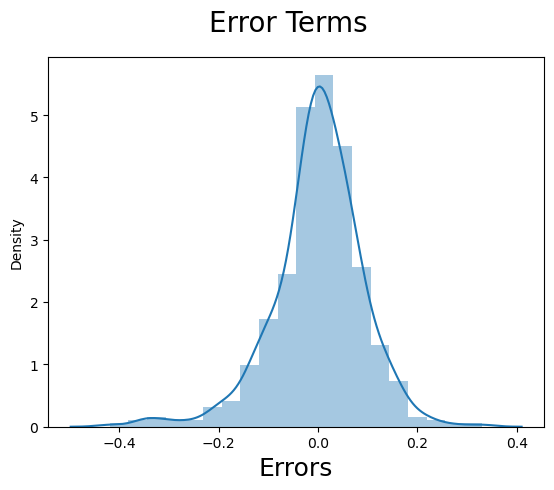

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 4: Prediction and Comparison on Test Set

In [88]:
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           1  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           1  29.315000  32.19710  30.5000  19.583229  4968   

     fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
184     1       0  ...    0    0    0    0    0    1    0    0    0    0  
535     0       0  ...    0    0    0    0    0    0    0    1    0    0  
299     0       0  ...    0    0    1    0    0    0    0    0    1    0  
221     1       0  ...    1    0    0    0    0    0    0    1    0    0  
152     0       0  ...    0    0    0    0    0    0    0    0    1    0  

[5 rows x 30 columns]

In [89]:

num_vars = ['temp','atemp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  \
184  0.692706     1       0  ...    0    0    0    0    0    1    0    0    0   
535  0.712034     0       0  ...    0    0    0    0    0    0    0    1    0   
299  0.303382     0       0  ...    0    0    1    0    0    0    0    0    1   
221  0.547400     1       0  ...    1    0    0    0    0    0    0    1    0   
152  0.569029     0       0  ...    0    0    0    0    0    0    0    0    1   

     Sun  
184    0  
535    0  
299    0  
221    0  
152    0  

[5 rows x 30 columns]

In [90]:
y_test = df_test.pop('cnt')

In [91]:
X_test=df_test

In [92]:
# add a constant to X_test for making predictions
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           1  0.817246  0.741471  0.314298   0.537414   

     fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
184     1       0  ...    0    0    0    0    0    1    0    0    0    0  
535     0       0  ...    0    0    0    0    0    0    0    1    0    0  
299     0       0  ...    0    0    1    0    0    0    0    0    1    0  
221     1       0  ...    1    0    0    0    0    0    0    1    0    0  
152     0       0  ...    0    0    0    0    0    0    0    0    1    0  

[5 rows x 30 columns]

In [93]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed        fall      spring      summer  ...         Aug  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.245455    0.254545    0.263636  ...    0.059091   
std      0.159584    0.431338    0.436599    0.441609  ...    0.236333   
min     -0.042808    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.000000    1.000000    1.000000  ...    0.000000   
max      0.807474    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Oct         Nov         Tue         Wed         Thu  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.086364    0.072727    0.145455    0.127273    0.168182   
std      0.281541    0.281541    0.260281    0.353363    0.334038    0.374881   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Fri         Sat         Sun  
count  220.000000  220.000000  220.000000  
mean     0.100000    0.163636    0.177273  
std      0.300684    0.370789    0.382770  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [94]:
# Remove certain columns from test set - atemp, const, humidity and month as they're not in the train set

In [95]:
X_test_sm = X_test_sm.drop(['atemp', 'Feb','Mar','Apr','May','Jun','Jul',
                            'Aug','Sep','Oct','Nov','Wed','Thu','Fri','Sat','Sun'], axis = 1)

In [96]:
X_test_sm.head()

const  yr  holiday  workingday      temp       hum  windspeed  fall  \
184    1.0   0        1           0  0.831783  0.657364   0.084219     1   
535    1.0   1        0           1  0.901354  0.610133   0.153728     0   
299    1.0   0        0           1  0.511964  0.837699   0.334206     0   
221    1.0   0        0           1  0.881625  0.437098   0.339570     1   
152    1.0   0        0           1  0.817246  0.314298   0.537414     0   

     spring  summer  clear  cloudy  Jan  Tue  
184       0       0      0       1    0    0  
535       0       1      1       0    0    0  
299       0       0      0       1    0    0  
221       0       0      1       0    0    0  
152       0       1      1       0    0    0

In [97]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [98]:
from sklearn.metrics import r2_score

In [99]:
# evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8040968202323097

# Recursive Feature Elimination

In [100]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [101]:
#We don't want to scale all the variables - only numeric ones
num_vars = ['temp','atemp', 'hum','windspeed','cnt']

#Step 2: Fit on Data
#scalar.fit()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  \
576  0.827658     1       0  ...    0    0    0    0    0    0    1    0    0   
426  0.465255     0       1  ...    0    0    0    0    0    0    0    0    0   
728  0.204096     0       1  ...    0    0    0    0    1    0    0    0    0   
482  0.482973     0       0  ...    0    0    0    0    0    0    0    0    0   
111  0.191095     0       0  ...    0    0    0    0    0    0    0    0    0   

     Sun  
576    0  
426    0  
728    0  
482    0  
111    1  

[5 rows x 30 columns]

## Dividing into X and Y sets for the model building

In [102]:
# X_train, y_train
y_train = df_train.pop('cnt') #removes price from df_train
X_train = df_train #assigns everything but price to X_train

## Building our model
##### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [103]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [104]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression() #lm is the model
lm.fit(X_train, y_train) #lm is passed through RFE - RFE needs model itself (fitted lm) and number of variables chosen

LinearRegression()

In [105]:
rfe = RFE(lm, step = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', False, 2),
 ('spring', True, 1),
 ('summer', False, 3),
 ('clear', True, 1),
 ('cloudy', True, 1),
 ('Jan', False, 3),
 ('Feb', False, 3),
 ('Mar', False, 3),
 ('Apr', False, 3),
 ('May', False, 2),
 ('Jun', False, 3),
 ('Jul', False, 3),
 ('Aug', False, 2),
 ('Sep', False, 2),
 ('Oct', False, 3),
 ('Nov', False, 3),
 ('Tue', False, 3),
 ('Wed', True, 1),
 ('Thu', True, 1),
 ('Fri', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1)]

In [107]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'clear', 'cloudy', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
      dtype='object')

In [108]:
X_train.columns[~rfe.support_]

Index(['atemp', 'fall', 'summer', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Tue'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics¶

In [109]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [110]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [111]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          5.94e-175
Time:                        20:39:14   Log-Likelihood:                 475.71
No. Observations:                 510   AIC:                            -923.4
Df Residuals:                     496   BIC:                            -864.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1242      0.047      2.621      0.0

In [112]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [113]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [114]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2      holiday     inf
3   workingday     inf
10         Wed     inf
11         Thu     inf
12         Fri     inf
13         Sat     inf
14         Sun     inf
0        const  122.89
8        clear   10.21
9       cloudy    8.88
5          hum    1.79
4         temp    1.69
7       spring    1.63
6    windspeed    1.16
1           yr    1.03

In [115]:
X_train_rfe  = X_train_rfe.drop(columns = ['Wed','Thu','Fri','Sat','Sun'])

In [116]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [117]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.17e-179
Time:                        20:39:14   Log-Likelihood:                 474.38
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     500   BIC:                            -886.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1271      0.047      2.691      0.0

In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0       const  122.47
8       clear   10.13
9      cloudy    8.77
5         hum    1.78
4        temp    1.69
7      spring    1.62
6   windspeed    1.16
3  workingday    1.07
2     holiday    1.06
1          yr    1.03

## Residual Analysis on train data

In [119]:
y_train_price = lm.predict(X_train_lm)

In [120]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

## Making the Predictions

In [121]:
# Doing the transformations of the test set

#We don't want to scale all the variables - only numeric ones
num_vars = ['temp','atemp', 'hum','windspeed','cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  \
184  0.692706     1       0  ...    0    0    0    0    0    1    0    0    0   
535  0.712034     0       0  ...    0    0    0    0    0    0    0    1    0   
299  0.303382     0       0  ...    0    0    1    0    0    0    0    0    1   
221  0.547400     1       0  ...    1    0    0    0    0    0    0    1    0   
152  0.569029     0       0  ...    0    0    0    0    0    0    0    0    1   

     Sun  
184    0  
535    0  
299    0  
221    0  
152    0  

[5 rows x 30 columns]

In [122]:
y_test = df_test.pop('cnt')
X_test = df_test

In [123]:
X_test

yr  holiday  workingday      temp     atemp       hum  windspeed  fall  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219     1   
535   1        0           1  0.901354  0.842587  0.610133   0.153728     0   
299   0        0           1  0.511964  0.496145  0.837699   0.334206     0   
221   0        0           1  0.881625  0.795343  0.437098   0.339570     1   
152   0        0           1  0.817246  0.741471  0.314298   0.537414     0   
..   ..      ...         ...       ...       ...       ...        ...   ...   
702   1        0           1  0.519232  0.511907  0.756118   0.283397     0   
127   0        0           0  0.584649  0.577380  0.650923   0.069510     0   
640   1        0           1  0.745598  0.682653  0.817947   0.052115     0   
72    0        0           1  0.331557  0.332005  0.512107   0.203418     0   
653   1        0           1  0.509887  0.501133  0.575354   0.300794     0   

     spring  summer  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
184       0       0  ...    0    0    0    0    0    1    0    0    0    0  
535       0       1  ...    0    0    0    0    0    0    0    1    0    0  
299       0       0  ...    0    0    1    0    0    0    0    0    1    0  
221       0       0  ...    1    0    0    0    0    0    0    1    0    0  
152       0       1  ...    0    0    0    0    0    0    0    0    1    0  
..      ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
702       0       0  ...    0    0    0    0    0    0    1    0    0    0  
127       0       1  ...    0    0    0    0    1    0    0    0    0    0  
640       0       0  ...    0    0    1    0    0    0    0    1    0    0  
72        1       0  ...    0    0    0    0    0    1    0    0    0    0  
653       0       0  ...    0    0    1    0    0    0    1    0    0    0  

[220 rows x 29 columns]

In [124]:
# Now let's use our model to make predictions.
X_test_new = sm.add_constant(X_test)
X_test_new

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           1  0.817246  0.741471  0.314298   0.537414   
..     ...  ..      ...         ...       ...       ...       ...        ...   
702    1.0   1        0           1  0.519232  0.511907  0.756118   0.283397   
127    1.0   0        0           0  0.584649  0.577380  0.650923   0.069510   
640    1.0   1        0           1  0.745598  0.682653  0.817947   0.052115   
72     1.0   0        0           1  0.331557  0.332005  0.512107   0.203418   
653    1.0   1        0           1  0.509887  0.501133  0.575354   0.300794   

     fall  spring  ...  Aug  Sep  Oct  Nov  Tue  Wed  Thu  Fri  Sat  Sun  
184     1       0  ...    0    0    0    0    0    1    0    0    0    0  
535     0       0  ...    0    0    0    0    0    0    0    1    0    0  
299     0       0  ...    0    0    1    0    0    0    0    0    1    0  
221     1       0  ...    1    0    0    0    0    0    0    1    0    0  
152     0       0  ...    0    0    0    0    0    0    0    0    1    0  
..    ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
702     0       0  ...    0    0    0    0    0    0    1    0    0    0  
127     0       0  ...    0    0    0    0    1    0    0    0    0    0  
640     0       0  ...    0    0    1    0    0    0    0    1    0    0  
72      0       1  ...    0    0    0    0    0    1    0    0    0    0  
653     0       0  ...    0    0    1    0    0    0    1    0    0    0  

[220 rows x 30 columns]

In [125]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   workingday  220 non-null    int64  
 4   temp        220 non-null    float64
 5   atemp       220 non-null    float64
 6   hum         220 non-null    float64
 7   windspeed   220 non-null    float64
 8   fall        220 non-null    uint8  
 9   spring      220 non-null    uint8  
 10  summer      220 non-null    uint8  
 11  clear       220 non-null    uint8  
 12  cloudy      220 non-null    uint8  
 13  Jan         220 non-null    uint8  
 14  Feb         220 non-null    uint8  
 15  Mar         220 non-null    uint8  
 16  Apr         220 non-null    uint8  
 17  May         220 non-null    uint8  
 18  Jun         220 non-null    uint8  
 19  Jul         220 non-null   

In [126]:
X_test_new = X_test_new.drop(['atemp', 'fall','summer','Feb','Jan','Feb','Mar','Apr','May','Jun','Jul',
                            'Aug','Sep','Oct','Nov','Tue','Wed','Thu','Fri','Sat','Sun'], axis = 1)

In [127]:
X_test_new.head()

const  yr  holiday  workingday      temp       hum  windspeed  spring  \
184    1.0   0        1           0  0.831783  0.657364   0.084219       0   
535    1.0   1        0           1  0.901354  0.610133   0.153728       0   
299    1.0   0        0           1  0.511964  0.837699   0.334206       0   
221    1.0   0        0           1  0.881625  0.437098   0.339570       0   
152    1.0   0        0           1  0.817246  0.314298   0.537414       0   

     clear  cloudy  
184      0       1  
535      1       0  
299      0       1  
221      1       0  
152      1       0

In [128]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

In [129]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

Text(0, 0.5, 'y')

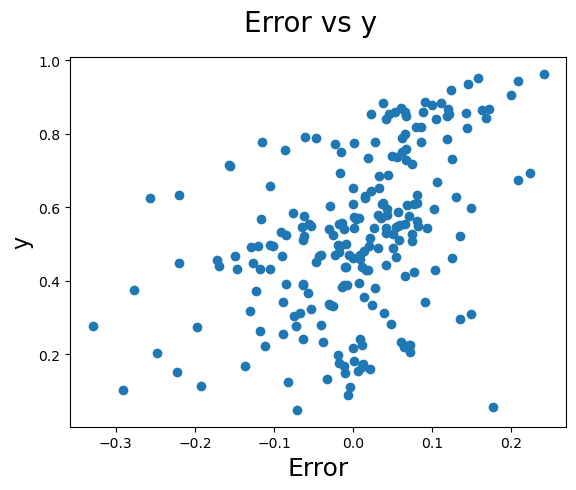

In [132]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test-y_pred,y_test)
fig.suptitle('Error vs y', fontsize=20)              # Plot heading 
plt.xlabel('Error', fontsize=18)                          # X-label
plt.ylabel('y', fontsize=16)                          # Y-label

In [130]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.801744417593817

## The above test shows a close match to the R2 on train data set of 0.819